# Exercicio 1

Você recebeu o arquivo *CLASSIFICATION_DATA.csv*. Carregue-o em um dataframe df. Considere que Target=1, um indivíduos será considerado um cliente especial. A um cliente especial, nossa empresa exige um pagamento adicional de 5000 reais devido a tarefas complexas no ramo publicitárias. Dessa forma, é importante classificar bem os indivíduos clientes NORMAIS (target=0) e os clientes ESPECIAIS (target=1). A ausência de classificação de indivíduos especiais causa um ônus de 5000 reais por cliente. Divida o dado em treino e teste segundo a relação:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)


1. Verifique a variável alvo e discuta a distribuição dos valores observados. Faça um gráfico de barras.

2. Utilize um modelo de IA de classificação para estimar y_test. Faça um gráfico da matriz de confusão em relação a y_test. Calcule F1_score, Precision e Recall.

3. Utilize um modelo de IA de classificação para estimar y_test, contudo, faça um oversample dos dados. Faça um gráfico da matriz de confusão em relação a y_test. Calcule F1_score, Precision e Recall.

4. Utilize um modelo de IA de classificação para estimar y_test, contudo, faça um undersample dos dados. Faça um gráfico da matriz de confusão em relação a y_test. Calcule F1_score, Precision e Recall.
    


In [11]:
!pip install --upgrade gdown
!gdown 1aonbD28QfbdolJBMQV0tjTPAGcBwkCwv

Downloading...
From: https://drive.google.com/uc?id=1aonbD28QfbdolJBMQV0tjTPAGcBwkCwv
To: /content/CLASSIFICATION_DATA.csv
100% 3.95M/3.95M [00:00<00:00, 123MB/s]


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB

In [13]:
df=pd.read_csv('CLASSIFICATION_DATA.csv')

In [14]:
df

,VAR_0,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,Target
0,-0.252851,0.303744,-0.251467,-0.345476,1.051370,0.084735,-1.120051,0.212190,1.128456,1.652177,...,-1.094160,-0.725720,-0.284066,-1.099955,-1.337883,0.866107,1.391478,0.299998,-1.427750,0
1,-1.260323,0.888270,1.395680,-0.415328,-0.112950,-0.551871,1.216609,-0.794750,-0.944225,-0.013426,...,0.639838,-0.499192,-0.686646,-0.370534,0.417959,-0.259205,-0.380366,2.851188,-1.005918,1
2,0.732527,0.182199,-0.674875,0.790469,-0.140526,-1.199873,0.017096,1.326455,0.381272,0.262963,...,-2.070491,0.177257,1.537373,-0.958356,2.359733,-1.093574,-1.226909,0.459132,-0.515472,1
3,-0.585251,-0.063286,0.585887,-1.565182,1.357573,1.338898,-0.428958,0.913192,2.971963,-0.358268,...,1.376216,0.181984,-1.512928,-1.088205,-0.443074,-1.316975,-1.585387,-0.896042,0.332659,0
4,-0.611630,0.793862,-0.028032,-0.574877,0.706458,0.197539,-1.092781,1.596296,0.375392,-0.445291,...,-1.605299,1.010495,-0.681575,1.125076,-0.588117,0.198212,-0.801422,0.736017,0.404574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.099512,-0.962464,0.037836,-0.588225,0.020634,-0.957361,0.405523,1.836893,0.560937,1.003823,...,-1.924355,-0.282090,1.676067,0.507124,-1.653266,0.459250,-0.139593,-0.484952,-0.681256,0
9996,0.679212,0.321107,-0.602524,-0.703430,-0.678687,0.187301,1.128512,1.502691,0.206948,-1.195039,...,-0.899455,1.728740,0.452472,-0.328831,0.432042,2.039312,-0.356548,-1.383312,-0.150576,0
9997,1.116231,0.184361,0.850435,-0.615938,-1.139160,-0.810793,0.797055,-1.456873,-0.632715,-0.681701,...,-0.570943,-0.208508,1.580942,-0.715417,1.186771,-0.160379,-0.934574,-0.716569,-0.536040,0
9998,1.777250,0.412015,1.013954,0.454728,-1.148916,-1.727974,1.395523,0.347543,0.426040,-1.235638,...,-0.156309,1.484240,2.844306,-0.160712,1.326849,0.821541,-0.960584,-0.532675,-0.404480,0


In [15]:
df.Target.value_counts()

Target
0    7957
1    2043
Name: count, dtype: int64

In [16]:
X=df.drop('Target',axis=1).values.copy()
y=df['Target'].values.copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [18]:
pd.Series(y_test).value_counts()

0    1553
1     447
Name: count, dtype: int64

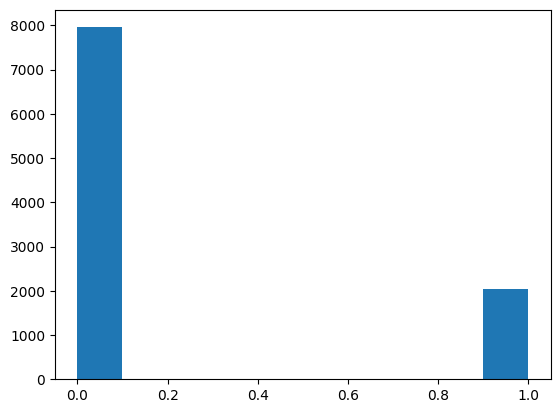

In [19]:
plt.hist(df['Target'])
plt.show()

In [20]:
modelo = GaussianNB()

In [21]:
modelo.fit(X_train,y_train)

GaussianNB()

In [22]:
y_pred = modelo.predict(X_test)

In [23]:
pd.Series(y_pred).value_counts()

0    1536
1     464
Name: count, dtype: int64

In [36]:
pd.DataFrame({'predicao':y_pred,'real':y_test})

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
1995,1,1
1996,0,1
1997,1,1
1998,0,0


In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1553
           1       0.85      0.88      0.86       447

    accuracy                           0.94      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.94      0.94      0.94      2000



In [39]:
matrix_confusao=confusion_matrix(y_test,y_pred)
matrix_confusao

array([[1482,   71],
       [  54,  393]])

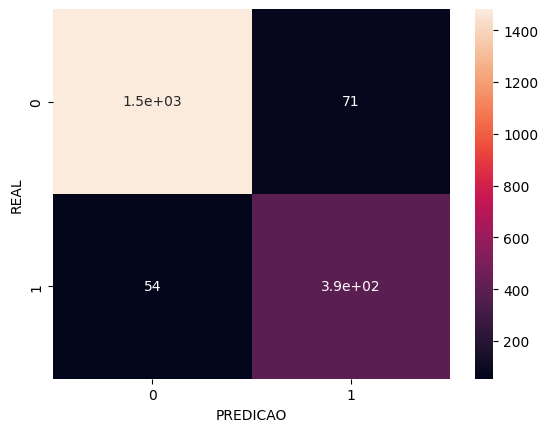

In [40]:
sns.heatmap(matrix_confusao,annot=True)
plt.ylabel('REAL')
plt.xlabel('PREDICAO')
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sobreamostragem,y_sobreamostragem=smote.fit_resample(X,y)
pd.Series(y).value_counts()

0    7957
1    2043
Name: count, dtype: int64

In [42]:
pd.Series(y_sobreamostragem).value_counts()

0    7957
1    7957
Name: count, dtype: int64

In [44]:
X_train_o,X_test_o,y_train_o,y_test_o=train_test_split(X_sobreamostragem,y_sobreamostragem,test_size=0.2,random_state=42)

In [45]:
modelo_o=GaussianNB()
modelo_o.fit(X_train_o,y_train_o)
y_pred_o=modelo_o.predict(X_test_o)

In [46]:
print(classification_report(y_test_o,y_pred_o))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1601
           1       0.92      0.94      0.93      1582

    accuracy                           0.93      3183
   macro avg       0.93      0.93      0.93      3183
weighted avg       0.93      0.93      0.93      3183



In [49]:
matrix_confusao_sobrea=confusion_matrix(y_test_o,y_pred_o)
matrix_confusao_sobrea

array([[1479,  122],
       [  93, 1489]])

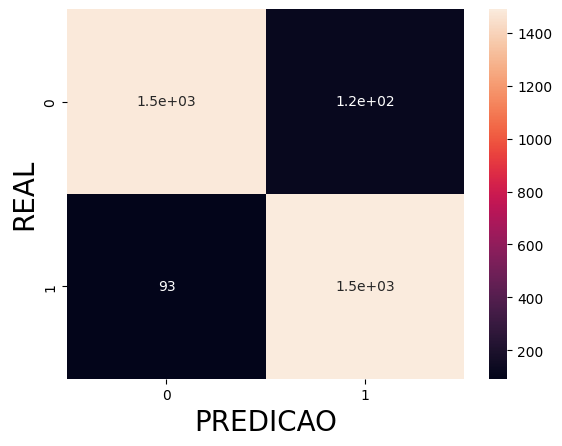

In [50]:
sns.heatmap(matrix_confusao_sobrea,annot=True)
plt.ylabel('REAL',fontsize=20)
plt.xlabel('PREDICAO',fontsize=20)
plt.show()

In [52]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler(sampling_strategy='majority')
X_under,y_under=under.fit_resample(X,y)
pd.Series(y).value_counts()

0    7957
1    2043
Name: count, dtype: int64

In [55]:
pd.Series(y_under).value_counts()

0    2043
1    2043
Name: count, dtype: int64

In [56]:
X_train_u,X_test_u,y_train_u,y_test_u=train_test_split(X_under,y_under,test_size=0.2,random_state=42)
modelo_u=GaussianNB()
modelo_u.fit(X_train_u,y_train_u)
y_pred_u=modelo_u.predict(X_test_u)

In [57]:
print(classification_report(y_test_u,y_pred_u))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       421
           1       0.91      0.93      0.92       397

    accuracy                           0.92       818
   macro avg       0.92      0.92      0.92       818
weighted avg       0.92      0.92      0.92       818



In [58]:
matrix_confusao_undler=confusion_matrix(y_test_u,y_pred_u)
matrix_confusao_undler

array([[385,  36],
       [ 26, 371]])

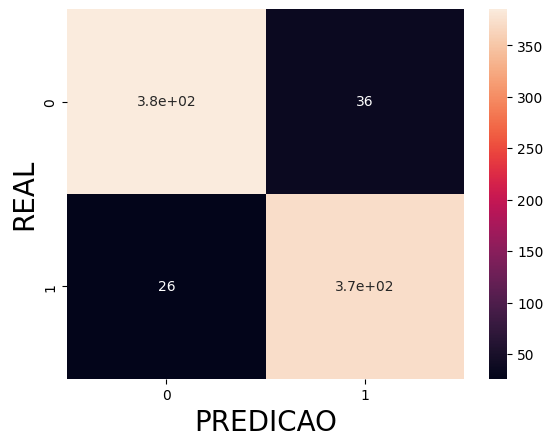

In [59]:
sns.heatmap(matrix_confusao_undler,annot=True)
plt.ylabel('REAL',fontsize=20)
plt.xlabel('PREDICAO',fontsize=20)
plt.show()